# DATA ANALYSIS OF FILM SUCCESS FOR A NEW MOVIE STUDIO

## BUSINESS UNDERSTANDING

To capitalize on the recent surge in original video content, our company is launching a new movie studio. This project seeks to analyze box office data to study the successes of films, genres, directors, among other key performance factors to help the company make informed decisions on the type of fims to produce. 

The project's findings will be translated into strategic recommendations, guiding stakeholders to make data-driven decisions and positioning the studio for success.

## DATA UNDERSTANDING

This analysis uses data sourced from [IMDb](https://www.imdb.com/), a database, and [TMDb](https://www.themoviedb.org/), a csv file, which provide comprehensive information on movies, including genres, directors, release dates, and audience ratings. 

Key attributes such as genre, release timing, and financial performance will be assessed to ensure accuracy in analyzing factors that contribute to box office success. Quality checks will address any missing values or inconsistencies to prepare the data for analysis.

## DATA PREPARATION & CLEANING

In this section, we'll preprocess the film data to ensure it's suitable for analysis. This involves importing the necessary libraries we'll use for our analysis, loading the data,  creating variables, cleaning the data, among other steps. 

The prepared data will enable reliable analysis, gaining insights into performance factors essential for making data-driven decisions for the new movie studio.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset we're working with and view
#Start with the im database

#Create a connection to the database
conn = sqlite3.connect('im.db')

In [3]:
#View the tables in the database
im = pd.read_sql("""SELECT * FROM sqlite_master""", conn)
im

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


The im.db database contains 8 tables. Our primary tables for analysis are the movie_basics, movie_ratings, directors, writers, and persons table

In [4]:
#View the tables we'll be working with
#Load the tables into a pandas dataframe

#View the movie_basics table
movie_basics_df =  pd.read_sql("""SELECT * FROM movie_basics""", conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
#View the movie_ratings table
movie_ratings_df =  pd.read_sql("""SELECT * FROM movie_ratings""", conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
# Merge movie_basics and movie_ratings on 'movie_id' to work with a single table
basics_rating_df = pd.merge(movie_basics_df, movie_ratings_df, on='movie_id', how='left');
basics_rating_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [7]:
#Check for null values in the merged df, the basics_rating_df
basics_rating_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

In [8]:
#Check the summary statistics for the merged df, the basics_rating_df
basics_rating_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,146144.000000,114405.000000,73856.000000,7.385600e+04
mean,2014.621798,86.187247,6.332729,3.523662e+03
std,2.733583,166.360590,1.474978,3.029402e+04
min,2010.000000,1.000000,1.000000,5.000000e+00
25%,2012.000000,70.000000,5.500000,1.400000e+01
50%,2015.000000,87.000000,6.500000,4.900000e+01
75%,2017.000000,99.000000,7.400000,2.820000e+02
max,2115.000000,51420.000000,10.000000,1.841066e+06


In [9]:
#Dealing with missing values in the basics_rating_df

# 1. original_title column
#Since this column is a title, we used primary_title values as a fill for the missing entries, as it’s reasonable to assume
#that if an original title is missing, the primary title may be similar.
basics_rating_df['original_title'].fillna(basics_rating_df['primary_title'], inplace=True)


# 2. runtime column
# Fill missing runtime_minutes with the overall median runtime, to reduce the effect of outliers
basics_rating_df['runtime_minutes'].fillna(basics_rating_df['runtime_minutes'].median(), inplace=True)


# 3. genres column
#Use a placeholder like "Unknown", as filling this with an actual genre could mislead the data analysis.
basics_rating_df['genres'].fillna("Unknown", inplace=True)


# 4. Fill missing values in 'averagerating' and 'numvotes' columns with the mean and median respectively
basics_rating_df['averagerating'].fillna(basics_rating_df['averagerating'].mean(), inplace=True)
basics_rating_df['numvotes'].fillna(basics_rating_df['numvotes'].median(), inplace=True)

In [10]:
# Confirm the missing values
basics_rating_df.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [11]:
#Check for duplicates
basics_rating_df.duplicated().sum()

0

In [12]:
#View the basics_rating_df again (movie_basics & movie_ratings merged)
basics_rating_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.000000,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.200000,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.900000,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.100000,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.500000,119.0
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,6.332729,49.0
6,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.100000,32.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.100000,263.0
8,tt0139613,O Silêncio,O Silêncio,2012,87.0,"Documentary,History",6.332729,49.0
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,6.332729,49.0


In [13]:
#Get general information of this df, the basics_rating_df
basics_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
 6   averagerating    146144 non-null  float64
 7   numvotes         146144 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


From the output above, our dataframe has 146,144 rows, 8 columns, and a mix of object, integer, and float data types. The dataframe has no missing values.

In [14]:
# To analyze any questions related to persons involved in these movies, we'll also need the directors, writers, and persons
#tables

#Load these tables and merge them to have all the persons information in a single dataframe

# 1. Directors table
directors_df = pd.read_sql("""SELECT * FROM directors""", conn)
directors_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [15]:
# 2. Writers table
writers_df = pd.read_sql("""SELECT * FROM writers""", conn)
writers_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [16]:
# 3. Persons table
person_df = pd.read_sql("""SELECT * FROM persons""", conn)
person_df

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [17]:
#From the person_df, let's drop the rows where the person passed away
persons_df = person_df[person_df['death_year'].isna()].copy()
persons_df

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [18]:
#From this table we don't need the birth and death years
persons_df.drop(columns=['birth_year', 'death_year'], inplace= True)

In [19]:
#View changes of the persons_df so far; 
persons_df

#The birth_year and death_year are dropped. 

,person_id,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"
...,...,...,...
606643,nm9990381,Susan Grobes,actress
606644,nm9990690,Joo Yeon So,actress
606645,nm9991320,Madeline Smith,actress
606646,nm9991786,Michelle Modigliani,producer


In [20]:
# Merge the writers and persons table to have all the information about the writer in one table
writer_df = writers_df.merge(persons_df, on= 'person_id', how= 'inner')
writer_df

,movie_id,person_id,primary_name,primary_profession
0,tt0285252,nm0899854,Tony Vitale,"producer,director,writer"
1,tt0438973,nm0175726,Steve Conrad,"writer,producer,director"
2,tt2358925,nm0175726,Steve Conrad,"writer,producer,director"
3,tt2543472,nm0175726,Steve Conrad,"writer,producer,director"
4,tt0359950,nm0175726,Steve Conrad,"writer,producer,director"
...,...,...,...,...
251788,tt8999892,nm10122247,C. Damon Adcock,None
251789,tt8999892,nm10122246,Bradley T. Castle,"actor,writer,producer"
251790,tt8999974,nm10122357,Daysi Burbano,"director,writer,cinematographer"
251791,tt9001390,nm6711477,Bernard Lessa,"director,writer,cinematographer"


In [21]:
# Merge the directors and persons to have all info about the director in one table
director_df = directors_df.merge(persons_df, on= 'person_id', how= 'inner')
director_df

,movie_id,person_id,primary_name,primary_profession
0,tt0285252,nm0899854,Tony Vitale,"producer,director,writer"
1,tt0462036,nm1940585,Bill Haley,"director,writer,producer"
2,tt0835418,nm0151540,Jay Chandrasekhar,"director,actor,writer"
3,tt0835418,nm0151540,Jay Chandrasekhar,"director,actor,writer"
4,tt0859635,nm0151540,Jay Chandrasekhar,"director,actor,writer"
...,...,...,...,...
289428,tt8999892,nm10122247,C. Damon Adcock,None
289429,tt8999974,nm10122357,Daysi Burbano,"director,writer,cinematographer"
289430,tt9001390,nm6711477,Bernard Lessa,"director,writer,cinematographer"
289431,tt9001494,nm10123242,Tate Nova,"director,producer"


In [22]:
# Most directors are also writers and vice versa. So we concatenated the two tables to have all of them in the same table
writers_directors_df = pd.concat([writer_df, director_df], ignore_index= True)
writers_directors_df

,movie_id,person_id,primary_name,primary_profession
0,tt0285252,nm0899854,Tony Vitale,"producer,director,writer"
1,tt0438973,nm0175726,Steve Conrad,"writer,producer,director"
2,tt2358925,nm0175726,Steve Conrad,"writer,producer,director"
3,tt2543472,nm0175726,Steve Conrad,"writer,producer,director"
4,tt0359950,nm0175726,Steve Conrad,"writer,producer,director"
...,...,...,...,...
541221,tt8999892,nm10122247,C. Damon Adcock,None
541222,tt8999974,nm10122357,Daysi Burbano,"director,writer,cinematographer"
541223,tt9001390,nm6711477,Bernard Lessa,"director,writer,cinematographer"
541224,tt9001494,nm10123242,Tate Nova,"director,producer"


In [23]:
# Check for missing values in the writers_directors_df
writers_directors_df.isnull().sum()

movie_id                 0
person_id                0
primary_name             0
primary_profession    1825
dtype: int64

With over half a million rows in the dataframe, we found the 1825 missing values to be significantly few (less than 1%). For this reason, we dropped these rows with missing values

In [24]:
# Drop rows with missing values from the writers_directors_df 
writers_directors_df.dropna(inplace= True)

In [25]:
# Brief view of the dataframe
writers_directors_df

,movie_id,person_id,primary_name,primary_profession
0,tt0285252,nm0899854,Tony Vitale,"producer,director,writer"
1,tt0438973,nm0175726,Steve Conrad,"writer,producer,director"
2,tt2358925,nm0175726,Steve Conrad,"writer,producer,director"
3,tt2543472,nm0175726,Steve Conrad,"writer,producer,director"
4,tt0359950,nm0175726,Steve Conrad,"writer,producer,director"
...,...,...,...,...
541219,tt8998302,nm10121510,Daryl Boman,"producer,director,writer"
541222,tt8999974,nm10122357,Daysi Burbano,"director,writer,cinematographer"
541223,tt9001390,nm6711477,Bernard Lessa,"director,writer,cinematographer"
541224,tt9001494,nm10123242,Tate Nova,"director,producer"


In [26]:
# Confirm there are no missing values
writers_directors_df.isnull().sum()

movie_id              0
person_id             0
primary_name          0
primary_profession    0
dtype: int64

#### From the im.db database, we now have two dataframes that we'll be conducting our analysis with. The basics_rating_df, which contains our films' details and the writers_directors_df, which contains the details of the persons associated with these films.

In [27]:
# To answer money-related questions, we'll make use of movie_budget dataset

#Let's load the budget dataset
budgets_df = pd.read_csv('tn.movie_budgets.csv')
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [28]:
# Check for missing values in this df
budgets_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [29]:
# Check for duplicate values
budgets_df.duplicated().sum()

0

In [30]:
# Check the general info about this dataframe
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


This dataset has 5782 rows, 6 columns, and no missing values. The datatype of all the columns is object except the id which is an integer. 

In [31]:
# Convert the 'release_date' column into a date time format 
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'])

In [32]:
# Creating a column for year
budgets_df['year'] = budgets_df['release_date'].dt.year

In [33]:
# Creating a column for month 
budgets_df['month']=budgets_df['release_date'].dt.month

In [34]:
# Another view of how our dataset looks
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,12
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,2018,12
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",1999,4
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,7
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,2015,9


In [35]:
# Confirm the data types in this dataframe
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
 6   year               5782 non-null   int64         
 7   month              5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 361.5+ KB


From this Data Preparation & Cleaning section, we have loaded the datasets we need for our analysis, merged tables for easier retrieval of data, cleaned and dealt with missing values by imputing some and dropping others, and checked the datatypes. 

#### We now have three dataframes that we'll work with for our analysis. The basics_rating_df, which has the films' details and the writers_directors_df, which contains details of the persons involved in these films. We also have a df that'll answer our money-related questions, the budgets_df. 

## DATA ANALYSIS

In this segment, we'll begin our analysis of the prepared data to answer the key objectives of this projects. The objectives of this analysis include finding; 

#### 1. What genres are doing best in box office that the company should prioritize producing? / (Genre vs Rating)
#### 2. Who are some of the most popular directors/writers that the company might consider collaborating with or hiring?
#### 3. What are the best times for releasing movies for highest returns? (months & seasons)
#### 4. What is the average production budget the company should expect?
#### 5. What is the average revenue of films?
#### 6. What has been the trend of movie production over the years?

### 1. What types of movies are doing best in box office?

In [36]:
# Top rated genres the company should prioritize producing

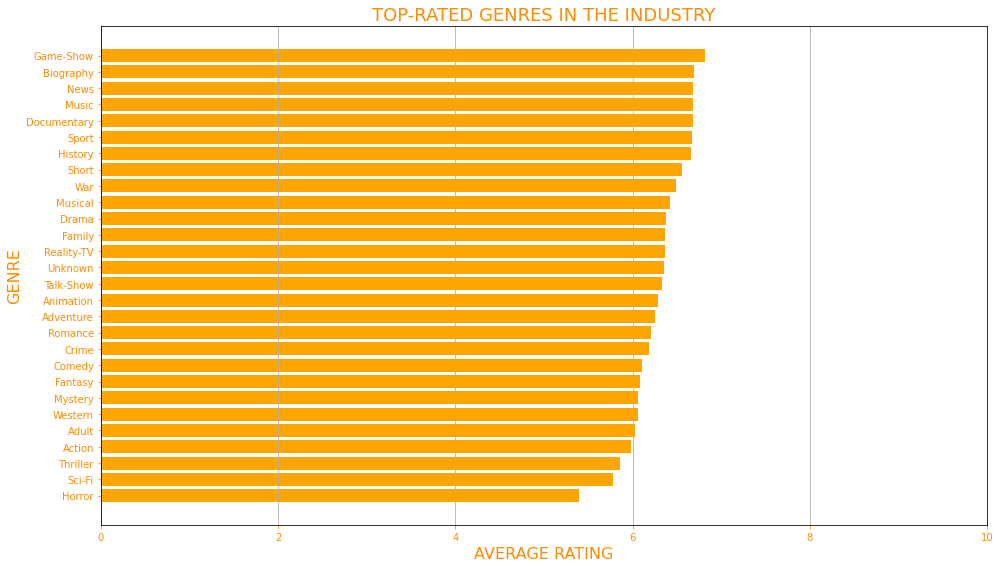

In [37]:
# Begin by spliting the contents in our 'genres' column by the comma. Then,since almost all these genres are a blend of 
#...different genres, we explode the column into separate rows to work with each genre individually rather than as a 
# collection of genres. This will also simplify the visualization.

# Split genres and explode the DataFrame to have one genre per row
basics_rating_df['genres'] = basics_rating_df['genres'].str.split(',')
df_exploded = basics_rating_df.explode('genres')

# Group by genre and calculate average rating for each genre
average_rating_by_genre = df_exploded.groupby('genres')['averagerating'].mean().reset_index()

# Sort the DataFrame by average rating in ascending order
average_rating_by_genre = average_rating_by_genre.sort_values(by='averagerating', ascending= False)

# Limit to the first 10 genres
top_30_genres = average_rating_by_genre.head(30)

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot
plt.barh(top_30_genres['genres'], top_30_genres['averagerating'], color='orange')

# Label the plot
plt.title('TOP-RATED GENRES IN THE INDUSTRY', color="darkorange", fontsize= 18)
plt.xlabel('AVERAGE RATING', color="darkorange", fontsize= 16)
plt.ylabel('GENRE',color="darkorange", fontsize= 16)
plt.tick_params(axis='x', colors="darkorange")  # X-axis tick color
plt.tick_params(axis='y', colors="darkorange")  # Y-axis tick color
plt.gca().invert_yaxis()  # To have the most popular on top
plt.xlim(0, 10)  # Set x-axis limit to 10 for better visibility
plt.grid(axis='x')

#Save the plot image
plt.savefig('Top Rated Genres')

# Display the plot
plt.tight_layout()
plt.show()

#### Recommendations;

1. Prioritize producing films in the highest-rated genres identified in the chart above, as these align with audience preferences and are likely to drive higher returns on investment.

2. Top-rated genres are often correlated with high viewership, so strategically invest in these genres to enhance audience engagement and maximize profitability.


##### Next steps;
- Conduct a deeper market analysis to investigate the trends of audience genre preferences and interests. Further, analyze the top creators of these top-rated genres and consider collaboration.

### 2. Who are some of the most popular directors/writers for films the company might consider hiring?

In [38]:
# Number of appearances of a creator in the dataframe. We're assuming that if they're producing/writing the most
# they're popular and active in the film industry. 

In [39]:
# Group by 'person_id' and 'primary_name' and count their occurrences (i.e number of movies they've worked on)
popular_creators = writers_directors_df.groupby(['person_id', 'primary_name']).size().reset_index(name='movie_count')
# .size() counts the number of rows for the groups created by groupby.

# Get the top 20 writers/directors who've worked on most films
popular_creators = popular_creators.nlargest(20, 'movie_count')
popular_creators

,person_id,primary_name,movie_count
127562,nm6935209,Tony Newton,781
37840,nm1546474,Shane Ryan,442
59256,nm2780568,Richard Chandler,262
92816,nm4664031,Michael J. Epstein,253
93010,nm4677186,Sophia Cacciola,252
78048,nm3877467,Ruben Rodriguez,245
68393,nm3344916,R.J. Wilson,244
115957,nm6078996,Martin Sonntag,237
55886,nm2563700,Jason Impey,236
82057,nm4097598,James Cullen Bressack,229


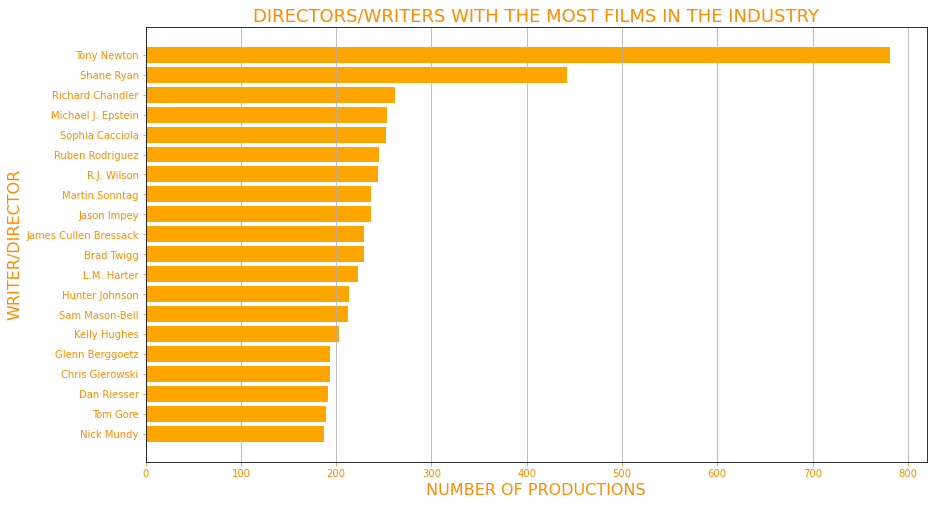

In [40]:
# Visualize these top creators 

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot
plt.barh(popular_creators['primary_name'], popular_creators['movie_count'], color='orange')

# Label the plot
plt.title('DIRECTORS/WRITERS WITH THE MOST FILMS IN THE INDUSTRY',color="darkorange", fontsize= 18)
plt.xlabel('NUMBER OF PRODUCTIONS',color="darkorange", fontsize= 16)
plt.ylabel('WRITER/DIRECTOR',color="darkorange", fontsize= 16)
plt.tick_params(axis='x', colors="darkorange")  # X-axis tick color
plt.tick_params(axis='y', colors="darkorange")  # Y-axis tick color
plt.gca().invert_yaxis()  # To have the most popular on top
plt.grid(axis='x')

# Save the figure as png
plt.savefig('Most_Popular_Creators')

# Display the plot
plt.show()

#### Recommendation
1. Collaborate with the prolific directors and writers identified in the analysis to leverage their industry experience, minimizing risks associated with inexperience.

2. Leverage the existing fan base of these creators to enhance the company’s credibility and attract an audience from the outset, fostering a strong market entry.


##### Next steps;
- Further investigate and analyze to understand the success rate of these creators, despite them producing the most films.

### 3. What are the best times for releasing movies for highest returns? (months / seasons)

In [41]:
# Check which months/seasons have the highest gross revenue

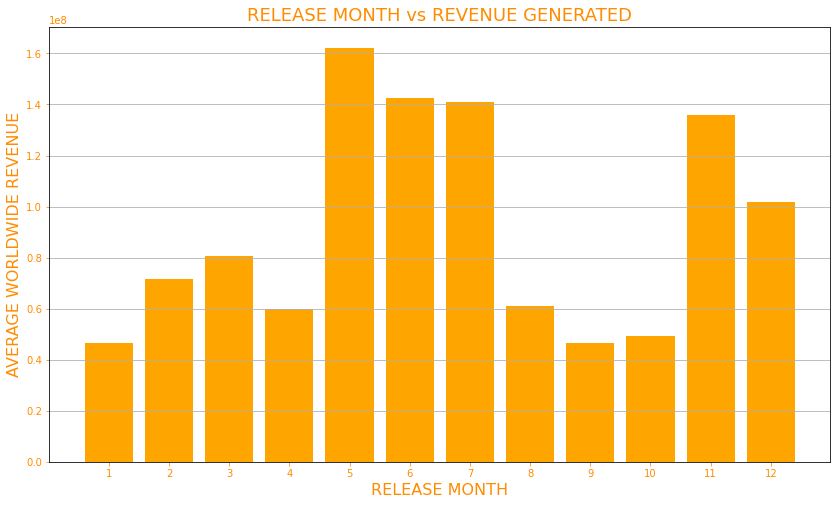

In [42]:
# Convert monetary columns from string to numeric
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Group by month and calculate the mean worldwide gross for each month
monthly_gross = budgets_df.groupby('month')['worldwide_gross'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot
plt.bar(monthly_gross['month'], monthly_gross['worldwide_gross'], color='orange')

# Label the plot
plt.title('RELEASE MONTH vs REVENUE GENERATED',color="darkorange", fontsize= 18)
plt.xlabel('RELEASE MONTH',color="darkorange", fontsize= 16)
plt.ylabel('AVERAGE WORLDWIDE REVENUE',color="darkorange", fontsize= 16)
plt.xticks(monthly_gross['month'])
plt.tick_params(axis='x', colors="darkorange")  # X-axis tick color
plt.tick_params(axis='y', colors="darkorange")  # Y-axis tick color
plt.grid(axis='y')

#Save the plot as image
plt.savefig('Average Worldwide Gross by Month')

# Show the plot
plt.show()

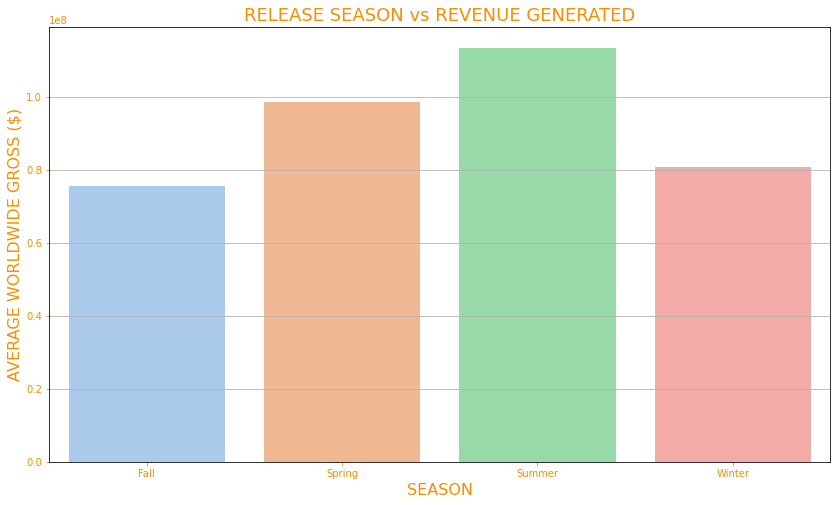

In [43]:
# Let's view this in terms of seasons:
# Ensure release_date is in datetime format and extract month
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'], errors='coerce')
budgets_df['month'] = budgets_df['release_date'].dt.month


# Function to define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Applying the function to get seasons
budgets_df['season'] = budgets_df['month'].apply(get_season)

# Data by each season
seasonal_performance = budgets_df.groupby('season').agg({'worldwide_gross': 'mean'}).reset_index()

# Set figure size
fig, ax = plt.subplots(figsize=(14, 8))

# Plot
sns.barplot(x='season', y='worldwide_gross', data=seasonal_performance, palette='pastel', ax=ax)

# Label the plot
plt.title('RELEASE SEASON vs REVENUE GENERATED',color="darkorange", fontsize= 18)
plt.ylabel('AVERAGE WORLDWIDE GROSS ($)',color="darkorange", fontsize= 16)
plt.xlabel('SEASON',color="darkorange", fontsize= 16)
plt.tick_params(axis='x', colors="darkorange")  # X-axis tick color
plt.tick_params(axis='y', colors="darkorange")  # Y-axis tick color
plt.grid(axis='y')

# Save the plot
plt.savefig('Average Worldwide Gross by Season')

#Display the plot
plt.show()

#### Recommendation;
1. Release high-budget films during the months/seasons with historically higher revenues to maximize audience engagement and box office performance.

2. Minimize major releases during the consistently low-revenue months/seasons; instead, consider using these periods for smaller films or niche projects, ensuring proper resource allocation.


##### Next steps;
- Investigate how various genres perform in specific months to identify trends and optimal release periods for each genre.
- Further analyze to find out the relationship between the time a movie is released and the revenue it generates. 

### 4. What is the average production budget the company should expect?

In [44]:
# For proper budgeting purposes, demonstrate the production bugets for various films.  

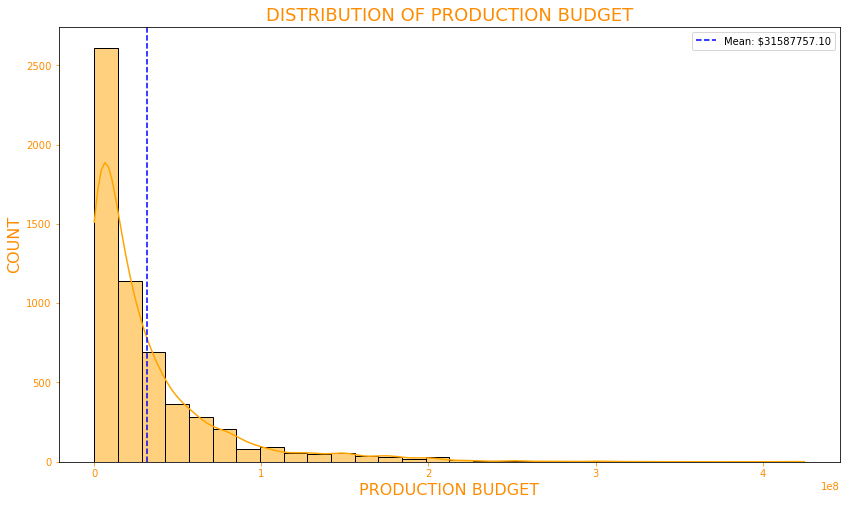

In [45]:
# Remove any non-numeric characters (e.g., $, commas) and convert to float dtype
budgets_df['production_budget'] = (budgets_df['production_budget'].replace('[\$,]', '', regex=True).astype(float))

# Calculate mean of worldwide gross revenue
mean_production_budget = budgets_df['production_budget'].mean()

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot
sns.histplot(budgets_df['production_budget'], bins=30, kde=True, color='orange')
plt.axvline(mean_production_budget, color='blue', linestyle='--', label=f'Mean: ${mean_production_budget:.2f}') #set mean to 2 decimal places

# Label the plot
plt.title('DISTRIBUTION OF PRODUCTION BUDGET',color="darkorange", fontsize= 18)
plt.xlabel('PRODUCTION BUDGET',color="darkorange", fontsize= 16)
plt.ylabel('COUNT',color="darkorange", fontsize= 16)
plt.tick_params(axis='x', colors="darkorange")  # X-axis tick color
plt.tick_params(axis='y', colors="darkorange")  # Y-axis tick color

# Save the plot image
plt.savefig('Distribution of production budget')

#Display the plot
plt.legend()
plt.show()

#### Recommendations;
1. Consider maintaining production budgets near or below the mean (as indicated by the red line) to minimize financial risk while remaining competitive in the market.



##### Next steps;
- Analyze the correlation between budget ranges and revenue success.

- Examine which genres require higher budgets and investigate the ROI at lower budget levels.

### 5. What is the average gross revenue of films?

In [46]:
# How much is the gross revenue generated in the film industry? With experience overtime, how much revenue should the
# company expect?

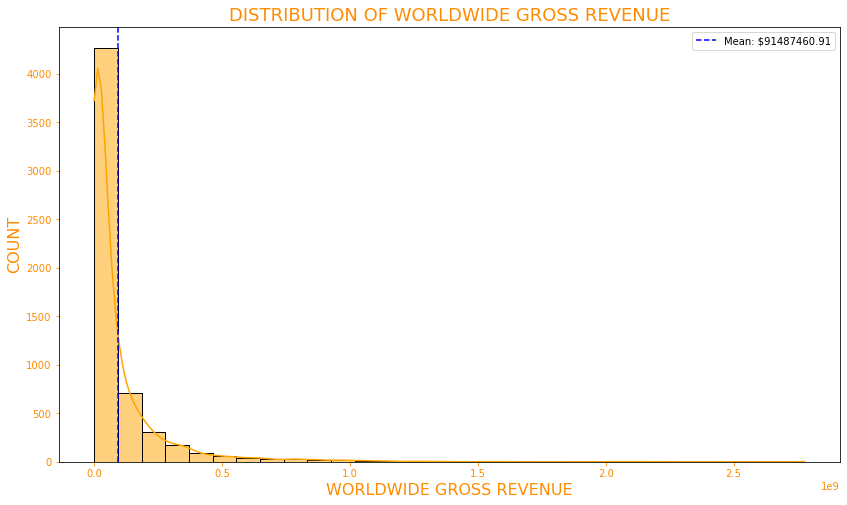

In [47]:
# Removing  non-numeric characters and converting them to float
budgets_df['worldwide_gross'] = (budgets_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float))


# Calculating the mean of worldwide gross revenue
mean_worldwide_gross = budgets_df['worldwide_gross'].mean()

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot
sns.histplot(budgets_df['worldwide_gross'], bins=30, kde=True, color='orange')

# Label the plot
plt.axvline(mean_worldwide_gross, color='blue', linestyle='--', label=f'Mean: ${mean_worldwide_gross:.2f}')
plt.title('DISTRIBUTION OF WORLDWIDE GROSS REVENUE',color="darkorange", fontsize= 18)
plt.xlabel('WORLDWIDE GROSS REVENUE',color="darkorange", fontsize= 16)
plt.ylabel('COUNT',color="darkorange", fontsize= 16)
plt.tick_params(axis='x', colors="darkorange")  # X-axis tick color
plt.tick_params(axis='y', colors="darkorange")  # Y-axis tick color
plt.legend()

# Save the plot image
plt.savefig('Distribution of Worldwide Gross Revenue')

# Display the plot
plt.show()

#### Recommendations;
1. Establish realistic revenue expectations, aiming for targets near or above the mean revenue to align with industry norms.

2. Assess if the target revenue for upcoming films falls within competitive brackets, ensuring alignment with successful films in the market.


##### Next steps;
- Analyze the correlation between production budgets and worldwide gross revenue to identify optimal budget levels for returns.

- Assess gross revenue by genre to find out high-performing genres for targeted investments.

### 6. What has been the trend of movie production over the years?

In [48]:
# What has been the trend of production of films over the years? Considering the rise of social media in the recent years,
# has the film industry been affected? Is this a viable business?

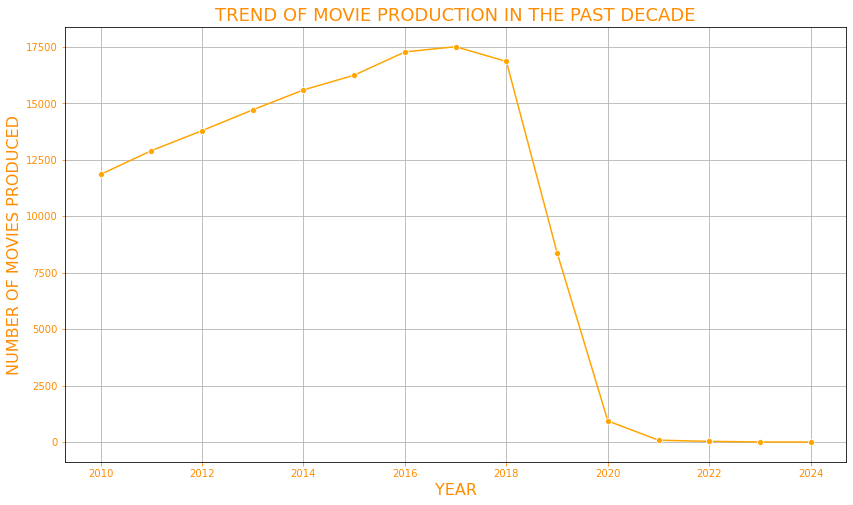

In [49]:
# Filter the dataframe to analyze the trend in the past decade
filtered_df = basics_rating_df[
    (basics_rating_df['start_year'] >= 2010) &
    (basics_rating_df['start_year'] <= 2024)
].copy()


# Group by 'start_year' and count the number of movies per year
movies_per_year = filtered_df['start_year'].value_counts().sort_index()

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o', color='orange')

# Label the plot
plt.title('TREND OF MOVIE PRODUCTION IN THE PAST DECADE',color="darkorange", fontsize= 18)
plt.xlabel('YEAR', color="darkorange", fontsize= 16)
plt.ylabel('NUMBER OF MOVIES PRODUCED', color="darkorange", fontsize= 16)
plt.tick_params(axis='x', colors="darkorange")  # X-axis tick color
plt.tick_params(axis='y', colors="darkorange")  # Y-axis tick color
plt.grid(True)

# Save the plot image
plt.savefig('Trend of movie production over the years')

# Display the plot
plt.show()

#### Recommendation;
1. Track the decline in movie production from 2019 to 2023 for potential industry challenges. In this case investigate the rise of social media and the effects of COVID-19 during this decline period. 

2. Plan a careful investment approach in new productions.


##### Next steps;
- Identify and study successful films released post-2020 to discern effective genres, budgets, and distribution platforms.

- Investigate how streaming has influenced production and profitability, shaping future distribution strategies.

### LINEAR REGRESSION

#### Linear Regression Model of the Relationship Between Production Budget and Worldwide Gross Revenue

In [50]:
#Defining the variables
x_1=budgets_df['production_budget'] #Independent variable
y_1=budgets_df['worldwide_gross'] #Dependent variable

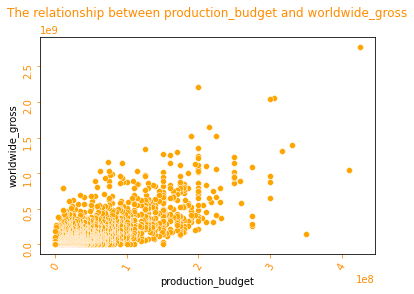

In [51]:
#Visualizing the relationship between the independent and the dependent variable using a scatter plot
plt.figsize=(16,16)
sns.scatterplot(x=x_1,y=y_1, color= 'orange')
plt.xticks(rotation=60)  # Rotate x-axis labels by 60 degrees
plt.yticks(rotation=90) #Rotate y-axis labels by 90 degrees
plt.title('The relationship between production_budget and worldwide_gross', pad=20, color= 'darkorange')
#Used pad to set a distance between the title and the start point of my plot.
plt.tick_params(axis='x', colors="darkorange")  # X-axis tick color
plt.tick_params(axis='y', colors="darkorange")  # Y-axis tick color

# Save the plot image
plt.savefig('Linear regression')

plt.show();

#### Interpretation

The scatter plot presents to have a not so perfect linear relationship between the variables but there is a positive relationship between production budget and wordwide gross revenue.

In [52]:
#Building the model
X=np.array(x_1).flatten() #Changing the variable into a 1-D array
model=sm.OLS(endog=y_1,exog=sm.add_constant(X))
model

In [53]:
#Fitting the model
results=model.fit()
results

In [54]:
#Evaluating the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     7355.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:59:56   Log-Likelihood:            -1.1557e+05
No. Observations:                5782   AIC:                         2.311e+05
Df Residuals:                    5780   BIC:                         2.311e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.286e+06   1.91e+06     -3.813      0.000    -1.1e+07   -3.54e+06
x1             3.1269      0.036     85.763      0.000       3.055       3.198
==============================================================================
Omnibus:                     4232.022   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172398.262
Skew:                           3.053   Prob(JB):                         0.00
Kurtosis:                      29.044   Cond. No.                     6.57e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpreting the Model

1. The overall model and our coefficients are statistically significant, with a p_value of less than the standard alpha 0.05. This implies that the the production budget is significantly related to the worldwide Gross Revenue.

2. The R-squared is 0.560 which implies that there is a 56% of the variability in worldwide_gross which can be explained by the production budget. Similarly, the R-squared value also implies that the model is a moderate fit.

3. The const(intercept) implies that if the company operates with a zero production budget, they would incur a loss of 7,286,000 USD.

4. The coefficient for the production budget (x1) is 3.1269. This implies that the company should expect approximately a 3.13% increase of the worldwide gross revenue for every 1% increase of the production budget. This tells that if the company was to increase the production budget by 1 million, they'd expect the worldwide gross to increase by about 313,000 USD.

#### Checking the model fit

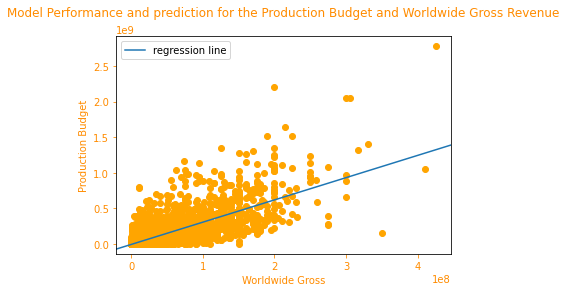

In [55]:
# Visualize model fit
fig, ax=plt.subplots()
ax.scatter(X,y_1, color= 'orange')
sm.graphics.abline_plot(model_results=results,label='regression line',ax=ax)
plt.title('Model Performance and prediction for the Production Budget and Worldwide Gross Revenue',pad=20, color="darkorange")
ax.set_ylabel('Production Budget', color="darkorange")
ax.set_xlabel('Worldwide Gross', color="darkorange")
plt.tick_params(axis='x', colors="darkorange")  # X-axis tick color
plt.tick_params(axis='y', colors="darkorange")  # Y-axis tick color
ax.legend()

# Save the plot image
plt.savefig('Checking the model fit')

plt.show();

#### Interpretation

1. The upward slope of the regression line indicates a positive relationship between Production Budget and Worldwide Gross. This suggests that, on average, as the production budget increases, the worldwide gross revenue tends to increase as well.

2. Visually, regression line depicts line of best fit illustrating how well our model is performing. Since most values are closely scattered around the regression line, it indicates that the model provides reasonably accurate predictions of worldwide gross revenue based on production budget. However, the presence of some scattered points, especially at higher budget levels, suggests that there are other influencing factors not captured by this model, indicating room for further exploration and improvement.

### Recommendation based on the model Analysis

Based on the analysis, we recommended that the company should consider budgeting for an increased production budget, as even a modest increase is likely to yield a proportional rise in worldwide gross revenue, enhancing overall profitability.

## CONCLUSION

This project has provided a comprehensive analysis of box office data sourced from [IMDb](https://www.imdb.com/) and [TMDb](https://www.themoviedb.org/), uncovering success factors in the film industry. By examining genres, prolific creators, among other factors, we've derived actionable insights to guide the new movie studio's production strategy. 

The visualizations effectively communicated these findings. As the company moves forward, leveraging these insights will be crucial for developing a profitable film portfolio and ensuring a competitive edge in the evolving landscape of original video content.